In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/food-delivery-time-prediction


In [7]:
# Load dataset
df=pd.read_csv(path+"/Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [8]:
df.shape

(1000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [10]:
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [11]:
#filling null values
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [12]:
df.shape

(1000, 9)

In [13]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.592000,56.732000
std,288.819436,5.696656,7.204553,2.871198,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [14]:
#check if there is duplication
df.duplicated().sum()

np.int64(0)

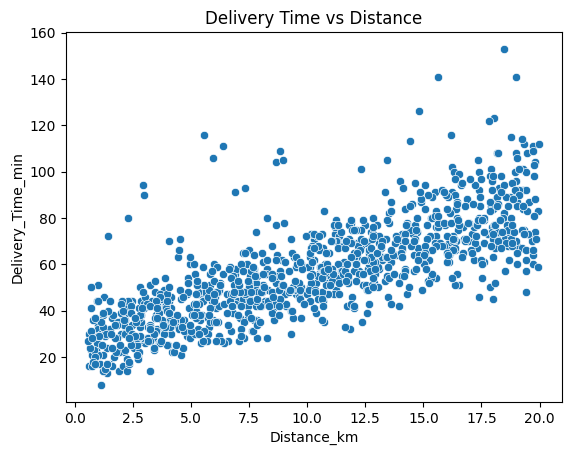

In [15]:
# Plot relation between Delivery time ,Distance
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=df)
plt.title("Delivery Time vs Distance")
plt.show()


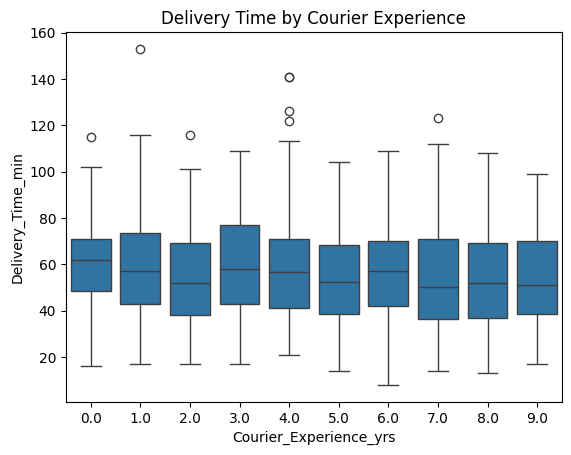

In [16]:
# Delivery Time by Courier Experience
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df)
plt.title("Delivery Time by Courier Experience")
plt.show()


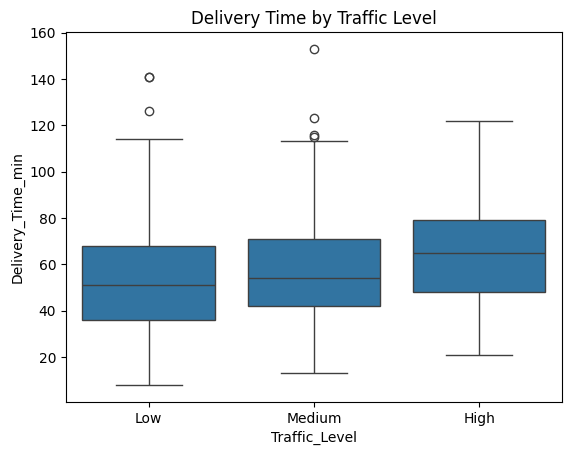

In [17]:
# Delivery Time by Traffic Level
sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', data=df)
plt.title("Delivery Time by Traffic Level")
plt.show()


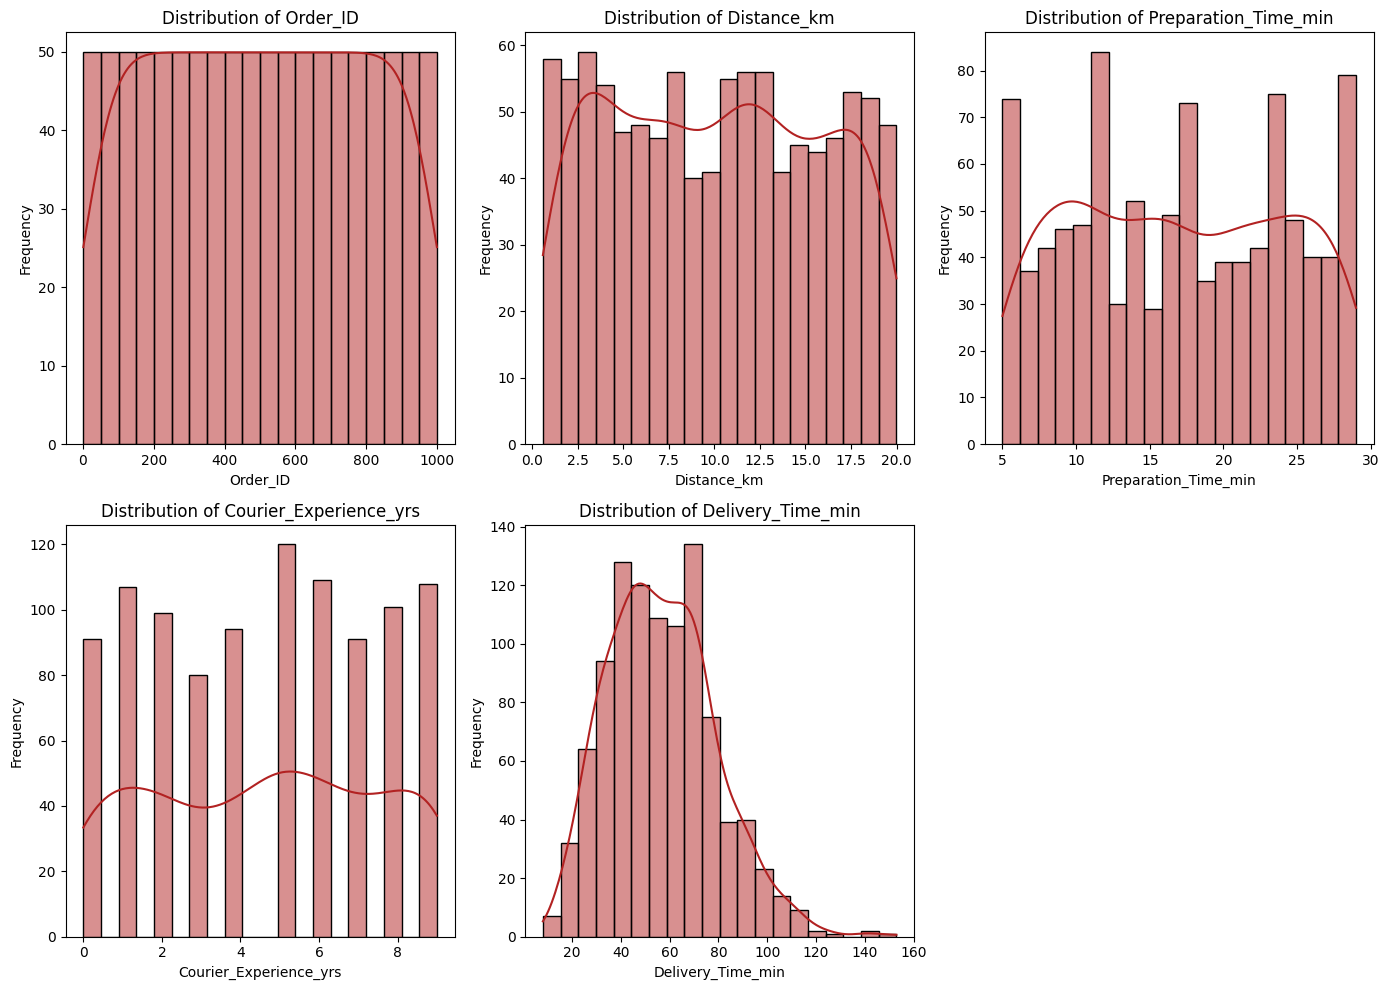

In [18]:
# plotting numerical column's didtribution
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='firebrick')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [19]:
# Cgecking num of unique values in each categorical column
print(df["Weather"].nunique())
print(df["Traffic_Level"].nunique())
print(df["Time_of_Day"].nunique())
print(df["Vehicle_Type"].nunique())

5
3
4
3


In [20]:
# Use label encoder to show correlation to the target value
cols_to_encode = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
df_label_encoded = df.copy()
le = LabelEncoder()
for col in cols_to_encode:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])


In [21]:
df_label_encoded.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,4,1,0,2,12,1.0,43
1,738,16.42,0,2,1,0,20,2.0,84
2,741,9.52,1,1,3,2,28,1.0,59
3,661,7.44,2,2,0,2,5,1.0,37
4,412,19.03,0,1,2,0,16,5.0,68


In [22]:
numerical_columns=["Distance_km","Preparation_Time_min","Courier_Experience_yrs"]

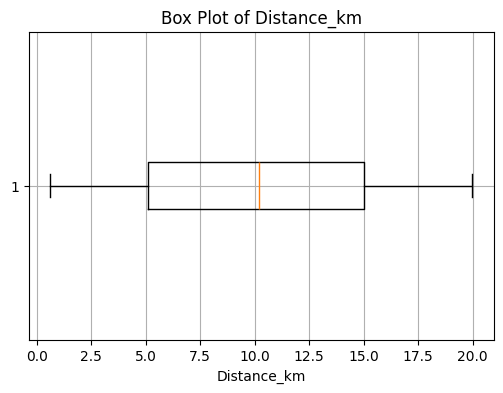

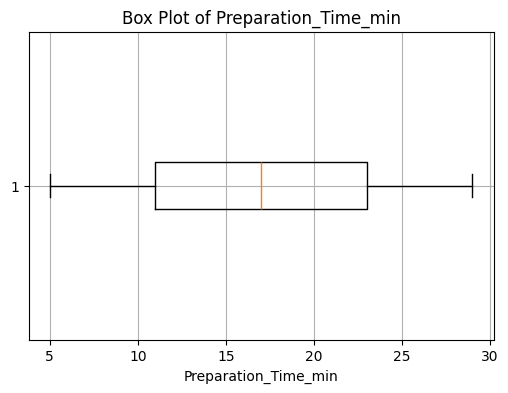

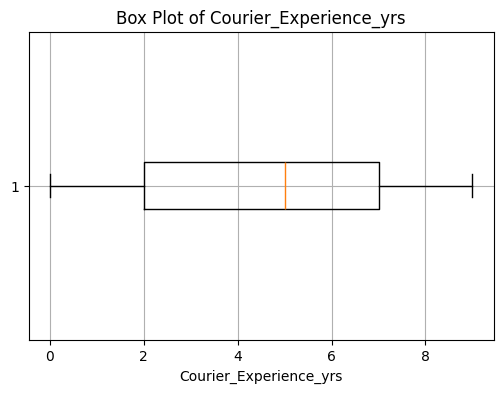

In [23]:
# Plotting Box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_label_encoded[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [24]:
# Check outliers using IQR
outlier_counts = {}

for col in numerical_columns:
    Q1 = df_label_encoded[col].quantile(0.25)
    Q3 = df_label_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_label_encoded[(df_label_encoded[col] < lower_bound) | (df_label_encoded[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Distance_km: 0 outliers
Preparation_Time_min: 0 outliers
Courier_Experience_yrs: 0 outliers


**After checking outliers we found 0 outliers**

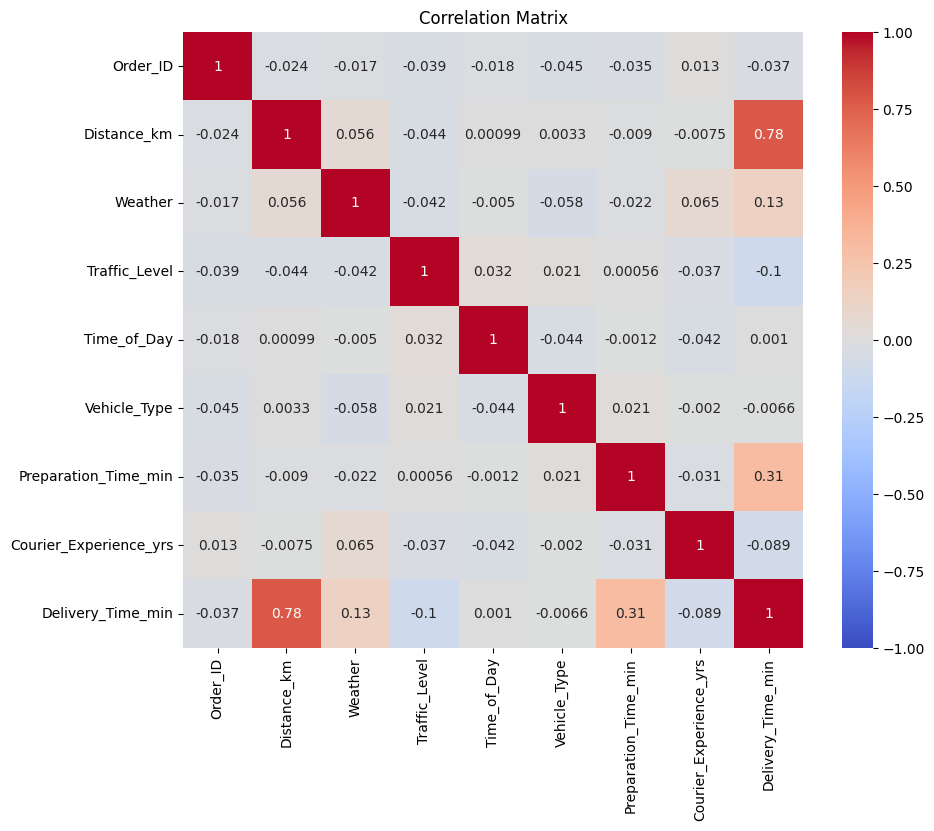

In [25]:
# plotting correlation
corr = df_label_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Depending on correlation we will delete vehicle type , time_of_day ,oder_ID ,Courier_Experience_yrs

In [26]:
# drop un necessary columns
df.drop(columns=["Order_ID","Time_of_Day","Vehicle_Type","Courier_Experience_yrs"],inplace=True)

In [27]:
df.head()

,Distance_km,Weather,Traffic_Level,Preparation_Time_min,Delivery_Time_min
0,7.93,Windy,Low,12,43
1,16.42,Clear,Medium,20,84
2,9.52,Foggy,Low,28,59
3,7.44,Rainy,Medium,5,37
4,19.03,Clear,Low,16,68


In [28]:
# we applied dummies her because we don't want the model get priority for high values in categorical columns
df_encoded = pd.get_dummies(df, columns=['Weather','Traffic_Level'], drop_first=True)

In [45]:
df_encoded.head()

,Distance_km,Preparation_Time_min,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium
0,7.93,12,43,False,False,False,True,True,False
1,16.42,20,84,False,False,False,False,False,True
2,9.52,28,59,True,False,False,False,True,False
3,7.44,5,37,False,True,False,False,False,True
4,19.03,16,68,False,False,False,False,True,False


**Modelling**

In [29]:
# Dropping Target
X = df_encoded.drop('Delivery_Time_min', axis=1)
y = df_encoded['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [36]:
# mdelling & testing
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Squared Error (MSE):", round(mse, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))
print("R² Score:", round(r2, 4))
print("Adjusted R² Score:", round(adjusted_r2, 4))


Mean Absolute Error (MAE): 6.0984
Mean Squared Error (MSE): 79.7831
Root Mean Squared Error (RMSE): 8.9321
R² Score: 0.822
Adjusted R² Score: 0.8145


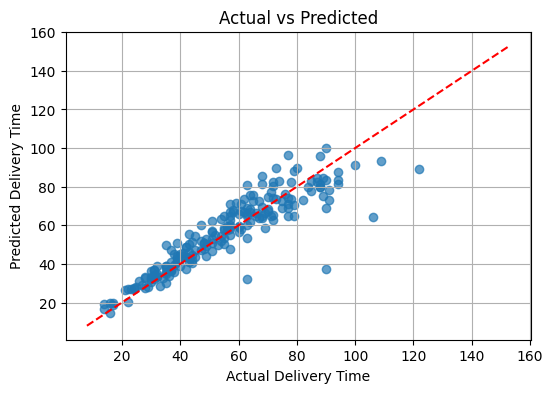

In [37]:
# Plot actual vs predicted time
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [38]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(ridge_model, f)


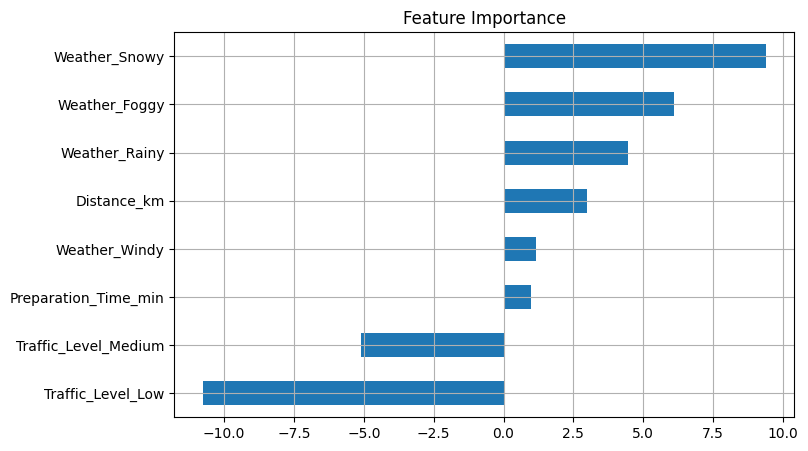

In [32]:
coeffs = pd.Series(model.coef_, index=X.columns)
coeffs.sort_values().plot(kind='barh', figsize=(8,5), title='Feature Importance')
plt.grid(True)
plt.show()


 Ridge Regression
Mean Absolute Error (MAE): 6.1055
Mean Squared Error (MSE): 80.0719
Root Mean Squared Error (RMSE): 8.9483
R² Score: 0.8214
Adjusted R² Score: 0.8139


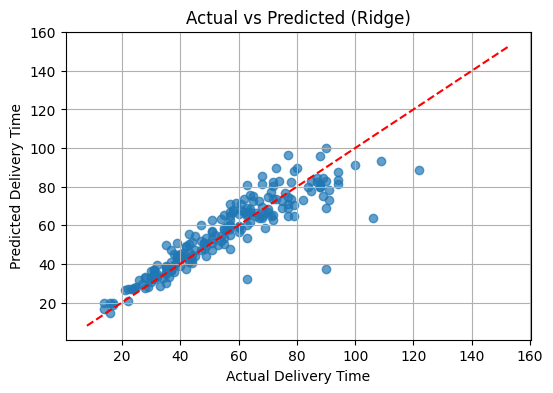

In [33]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - k - 1)

print(" Ridge Regression")
print("Mean Absolute Error (MAE):", round(mae_ridge, 4))
print("Mean Squared Error (MSE):", round(mse_ridge, 4))
print("Root Mean Squared Error (RMSE):", round(rmse_ridge, 4))
print("R² Score:", round(r2_ridge, 4))
print("Adjusted R² Score:", round(adjusted_r2_ridge, 4))

# Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted (Ridge)")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


Lasso Regression
Mean Absolute Error (MAE): 6.2275
Mean Squared Error (MSE): 84.0258
Root Mean Squared Error (RMSE): 9.1666
R² Score: 0.8125
Adjusted R² Score: 0.8047


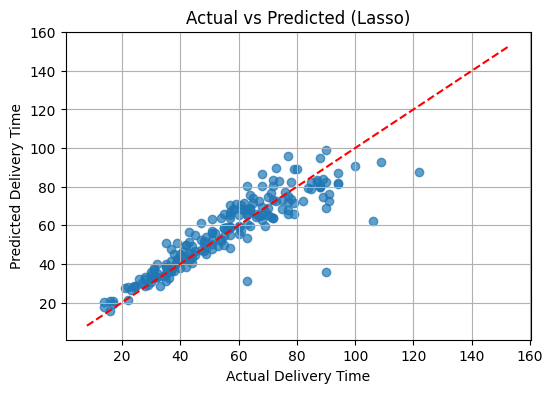

In [34]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

adjusted_r2_lasso = 1 - (1 - r2_lasso) * (n - 1) / (n - k - 1)

print("Lasso Regression")
print("Mean Absolute Error (MAE):", round(mae_lasso, 4))
print("Mean Squared Error (MSE):", round(mse_lasso, 4))
print("Root Mean Squared Error (RMSE):", round(rmse_lasso, 4))
print("R² Score:", round(r2_lasso, 4))
print("Adjusted R² Score:", round(adjusted_r2_lasso, 4))

# Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lasso, alpha=0.7)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted (Lasso)")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


# Here linear regression is the best one

#  Deployment

We deployed the trained model using  Hugging Face Spaces.  
You can try it live here:  
🔗 [https://huggingface.co/spaces/abdelrhman145/food_delivery_time_prediction](https://huggingface.co/spaces/abdelrhman145/food_delivery_time_prediction)
